In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
CData = pd.read_csv("Countries.csv")

In [4]:
CData.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
CData.head(10)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [6]:
CData.shape

(241, 3)

In [7]:
CData.dtypes

name          object
Longitude    float64
Latitude     float64
dtype: object

In [8]:
CData['Longitude'].describe()

count    241.000000
mean      14.215380
std       72.013654
min     -177.348348
25%      -36.433184
50%       18.644925
75%       47.587005
max      171.484924
Name: Longitude, dtype: float64

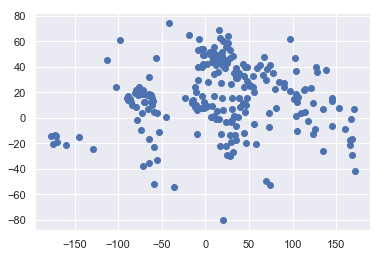

In [9]:
plt.scatter(CData['Longitude'],CData['Latitude'])

In [10]:
NCData = CData.iloc[:, 1:3]

In [11]:
NCData

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [12]:
NCData.shape

(241, 2)

In [13]:
kmeansPubudu = KMeans(2)

In [14]:
kmeansPubudu.fit(NCData)

KMeans(n_clusters=2)

In [15]:
identified_clusters = kmeansPubudu.fit_predict(NCData)

In [16]:
identified_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [17]:
len(identified_clusters)

241

In [18]:
Country_cluster = CData.copy()

In [19]:
Country_cluster

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [20]:
Country_cluster["Cluster No"] = identified_clusters

In [21]:
Country_cluster

,name,Longitude,Latitude,Cluster No
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


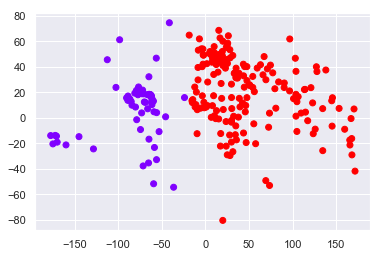

In [22]:
plt.scatter(Country_cluster["Longitude"],Country_cluster["Latitude"], c = Country_cluster["Cluster No"], cmap="rainbow")

In [45]:
wcss=[]
for i in range(1,11):
    kmeansPubudu = KMeans(i)
    kmeansPubudu.fit(NCData)
    wcss_iter = kmeansPubudu.inertia_
    wcss.append(wcss_iter)

In [46]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934307,
 192194.98290025242,
 152164.15221066383,
 126758.35414179866,
 102873.25264457411,
 84927.05022223278,
 76541.55015101019]

Text(0, 0.5, 'Within-cluster Sum of Squares')

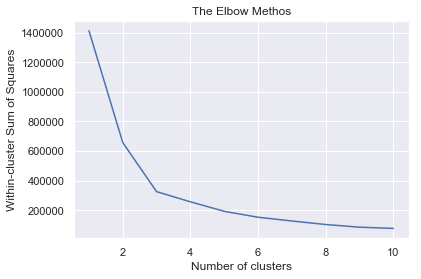

In [48]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Methos')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [63]:
kmeans1 = KMeans(3)

In [64]:
kmeans1.fit(NCData)

KMeans(n_clusters=3)

In [65]:
identified_cluster1 = kmeans1.fit_predict(NCData)

In [66]:
identified_cluster1

array([0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2])

In [67]:
Country_cluster1 = CData.copy()

In [68]:
Country_cluster1["Clust No"] = identified_cluster1

In [69]:
Country_cluster1

,name,Longitude,Latitude,Clust No
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


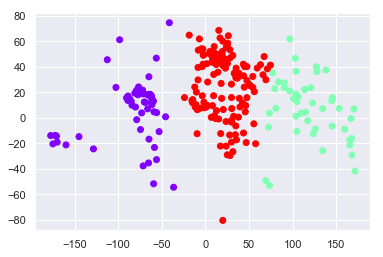

In [71]:
 plt.scatter(Country_cluster1["Longitude"], Country_cluster1["Latitude"], c = Country_cluster1["Clust No"], cmap="rainbow")